# DataKind - Viamo DataDive Project

**Author:** Paria Elyasi<br>
**Contact:** pariae@me.com<br>
**Date:** 12-02-2022<br>
**Notebook**: 1 of 1<br>

## Overview / Problem Statement

Interactive voice recognition (IVR) technology has been around for over a half century.  At its core, IVR functionality provides a framework for information exchange between a service provider and a service recipient using pre-established information flows that can be navigated from a touch-tone phone. A case example of IVR commercial success was Moviefone, which operated from 1989-2014 as an IVR product where individuals could call a service line to gain information on movie times in their local area. IVR continues to see commercial success as a component of customer service strategies, as a counterpart to web-based chatbots, as a tool to remove human resources from routine information collection and intake. As a tool for social service delivery, IVR has continued to be used across developed economies - despite the proliferation of smartphones and internet services - for social services, such as extreme weather alerts and healthcare management. In many contexts, the competitor to IVR is the radio, and the key differentiators for IVR as a product is the on-demand nature of content and the interactive nature.  In other contexts, the chief competitor of IVR is internet access provided through social networks, such as Facebook, where a customer would have access to a community of knowledge to self-serve information from an internet/app based medium.  In a final context, the competitor is SMS-based automation, which typically has very low engagement levels (e.g. chatbot-style technology).

In places with low internet penetration and low literacy, IVR can prove to be a key tool for trusted information dissemination (e.g. weather), health education (e.g. parenting), and medication reminders (e.g. tuberculosis treatments.)  Crucially, IVR can disseminate information that is personalized to the customer and is information that could not be gathered in other ways - either because there is an information gap in the community or because the subject is taboo or has cultural implications such that the customer would not feel comfortable seeking information from others in the community. While IVR technology does compete with SMS and app-provided internet, these options continue to be inaccessible or less accessible to illiterate or low-literacy populations. IVR services are provided by a number of actors, and one of the largest and best established is Viamo.

**The 3-2-1 platform has a challenge of converting users to consistent/regular users, defined as the monthly average user count (MAU). Despite strong, positive customer feedback (70% would recommend the service), few users convert from an initial acquisition experience (e.g. getting the single piece of information they were looking for) to a retained customer who returns to the platform regularly for information across one, or multiple, domains.**  While this lack of retention has business implications for Viamo, it also has a potential social impact - without regular uptake of information across the 3-2-1 platform, individuals in target communities are likely not receiving appropriate and timely information that would allow them to make informed decisions related to health, education, and economics.  Single use of an IVR system is a small intended segment of overall customer population targets - there is an expectation that single use might increase in times of emergency or crisis (e.g. the number of users who came to the Viamo platform during the COVID-19 pandemic), but the design of an IVR platform as an information aggregation platform with consistently updated, reliable content that is shared through sequential engagements means that the expectation is that most customers will need to be repeat users to prove the system’s theory of change. 


### Importing the Data

First we will import basic libraries for our inital EDA and install packages necessary for reading in our data.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]='/Users/pariaelyasi/Desktop/viamo-datakind-19b12e3872f5.json'

In [4]:
#pip install google-cloud

In [5]:
#pip install google-cloud-bigquery

In [6]:
#pip install google-cloud-storage

In [7]:
#pip install pandas-gbq -U

In [8]:
from google.cloud import bigquery

In [9]:
Bigquery_client = bigquery.Client()

In [10]:
query = """
SELECT *
FROM `viamo-datakind.datadive.321_sessions_1122` 
WHERE call_date = '2022-08-10' AND subscriber_id = 1403837547184390800 LIMIT 10
"""

results = Bigquery_client.query(query)

for result in results:
    print(result)

Row((datetime.date(2022, 8, 10), datetime.datetime(2022, 8, 10, 5, 15, 37, tzinfo=datetime.timezone.utc), 1403970000339340744, 1403969884387806284, 1403837547184390800, datetime.datetime(2022, 8, 10, 5, 15, 37, tzinfo=datetime.timezone.utc), datetime.datetime(2022, 8, 10, 5, 15, 32, tzinfo=datetime.timezone.utc), 'block_1626363341993_41', 36972, datetime.datetime(2022, 8, 10, 5, 15, 4, tzinfo=datetime.timezone.utc), datetime.datetime(2022, 8, 10, 5, 15, 37, tzinfo=datetime.timezone.utc), 0.1, 5.0, 'EAF', 'East Africa', 559393309458432000, 'Uganda', 100.0, None, None, None, 'Listen Menu', None, '', '', '', '18_24', 'male', 'region_nw_westnile', None, 'yes_contact', 'Luo', 1403837547184390800, None, None, None, None, None, None, None, None, None, None, None), {'call_date': 0, 'dl_global_created_at': 1, 'block_interaction_id': 2, 'call_id': 3, 'subscriber_id': 4, 'block_global_created_at': 5, 'block_entry_at': 6, 'js_key': 7, 'tree_version_set_id': 8, 'call_started': 9, 'call_ended': 10, 

In [11]:
df = pd.read_gbq("SELECT * FROM `viamo-datakind.datadive.321_sessions_1122` LIMIT 100")

In [12]:
#check the data
df.head()

,call_date,dl_global_created_at,block_interaction_id,call_id,subscriber_id,block_global_created_at,block_entry_at,js_key,tree_version_set_id,call_started,...,phone_type,education_level,income_source,airtime_expense,highest_expense_area,data_usage_consent,new_listener_ever,new_listener_year,new_caller_ever,new_caller_year
0,2022-08-22,2022-08-22 16:23:12+00:00,1408486077303850500,1408486073113743308,1163031229725933568,2022-08-22 16:21:00+00:00,2022-08-22 16:20:49+00:00,block_1635535649871_28,19069,2022-08-22 16:20:48+00:00,...,null,null,null,null,null,yes_consent,<NA>,<NA>,<NA>,<NA>
1,2021-07-18,2021-07-18 18:13:39+00:00,1263552836105987964,1263552587471841832,798531682041856098,2021-07-18 17:57:51+00:00,2021-07-18 17:47:51+00:00,block_1602776841866_61,22441,2021-07-18 17:46:52+00:00,...,None,None,None,None,None,None,<NA>,<NA>,<NA>,<NA>
2,2022-11-13,2022-11-13 08:16:14+00:00,1438440448577734796,1438440048080422708,1438434199358376156,2022-11-13 08:08:50+00:00,2022-11-13 08:08:47+00:00,block_1649054899824_43,44157,2022-11-13 08:07:12+00:00,...,null,null,null,null,null,Yes_consent,<NA>,<NA>,<NA>,<NA>
3,2022-08-01,2022-08-01 20:17:15+00:00,1400934399574771008,1400930644674445604,1253264700167651736,2022-08-01 20:13:19+00:00,2022-08-01 20:13:08+00:00,block_1651189142265_73,44158,2022-08-01 19:58:13+00:00,...,basic mobile phone_v2,primary school_v2,Other income source,below 100 naira airtime_v2,other expenses_v2,No_Consent,<NA>,1253264700167651736,<NA>,1253264700167651736
4,2022-11-14,2022-11-14 09:32:13+00:00,1438823055295481596,1438820866774763424,1438434199358376156,2022-11-14 09:32:13+00:00,2022-11-14 09:29:08+00:00,block_1640196468445_47,40712,2022-11-14 09:20:26+00:00,...,null,null,null,null,null,Yes_consent,<NA>,<NA>,<NA>,<NA>


In [13]:
#look at 5 random rows
df.sample(5)

,call_date,dl_global_created_at,block_interaction_id,call_id,subscriber_id,block_global_created_at,block_entry_at,js_key,tree_version_set_id,call_started,...,phone_type,education_level,income_source,airtime_expense,highest_expense_area,data_usage_consent,new_listener_ever,new_listener_year,new_caller_ever,new_caller_year
21,2022-10-25,2022-10-25 13:30:43+00:00,1431635013828838032,1431633102291569064,1431614967152871532,2022-10-25 13:26:43+00:00,2022-10-25 13:26:25+00:00,block_1649666109498_14,44153,2022-10-25 13:18:50+00:00,...,null,middle_school,self_employed,200_500_naira,education,No_Consent,<NA>,<NA>,<NA>,<NA>
73,2021-09-01,2021-09-01 17:11:08+00:00,1279851018074983616,1279850546387748644,1225764549492736712,2021-09-01 17:11:08+00:00,2021-09-01 17:11:01+00:00,block_1583499662738_90,20063,2021-09-01 17:09:08+00:00,...,None,None,None,None,None,None,<NA>,<NA>,<NA>,<NA>
63,2022-04-14,2022-04-14 11:48:13+00:00,1361306189014994076,1361306018772388164,1361293052505195572,2022-04-14 11:44:55+00:00,2022-04-14 11:44:47+00:00,block_1641245073679_23,40767,2022-04-14 11:44:06+00:00,...,None,None,None,None,None,None,<NA>,<NA>,<NA>,<NA>
1,2021-07-18,2021-07-18 18:13:39+00:00,1263552836105987964,1263552587471841832,798531682041856098,2021-07-18 17:57:51+00:00,2021-07-18 17:47:51+00:00,block_1602776841866_61,22441,2021-07-18 17:46:52+00:00,...,None,None,None,None,None,None,<NA>,<NA>,<NA>,<NA>
90,2022-09-14,2022-09-14 14:39:07+00:00,1416788504809573320,1416788176622062152,1345416442665240168,2022-09-14 14:12:01+00:00,2022-09-14 14:11:42+00:00,block_1601901407422_68,36972,2022-09-14 14:10:23+00:00,...,None,None,None,None,None,None,<NA>,<NA>,<NA>,<NA>


In [14]:
#get data shape to make sure all 100 requested rows are there
df.shape

(100, 44)

Great, now we can look at the info to get all columns and their data types in our dataset. 

In [15]:
#get info about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   call_date                       100 non-null    dbdate             
 1   dl_global_created_at            100 non-null    datetime64[ns, UTC]
 2   block_interaction_id            100 non-null    Int64              
 3   call_id                         100 non-null    Int64              
 4   subscriber_id                   100 non-null    Int64              
 5   block_global_created_at         100 non-null    datetime64[ns, UTC]
 6   block_entry_at                  100 non-null    datetime64[ns, UTC]
 7   js_key                          100 non-null    object             
 8   tree_version_set_id             100 non-null    Int64              
 9   call_started                    100 non-null    datetime64[ns, UTC]
 10  call_ended     

Note that `call_date` is not in the datetime format and we will update this later for our Mali dataset. For now we will leave it.

From the above info, we can update the data dictionary.

#### Data Dictionary

|**Column Name**| **Description**| **Data Type** |
| :--- | :--- |:--- |
|**call_date**| Date when the interaction with Viamo happened  | Date |
|**dl_global_created_at**| Timestamp of when the call was logged (For Internal Use)| Datetime |
|**block_interaction_id**| Unique interaction ID (Unique row identifier)| Numeric |
|**call_id**|Unique call ID | Numeric|
|**subscriber_id**| Unique Subscriber ID (Unique ID for every caller)|Numeric|
|**block_global_created_at**|  |  Datetime|
|**block_entry_at**|  | Datetime |
|**js_key**|  | Categorical |
|**tree_version_set_id**| |  |
|**call_started**| |  |
|**call_ended**| |  |
|**duration_listened_minutes**| |  |
|**duration_listened_seconds**| |  |
|**region**| |  |
|**region_name**| |  |
|**organization_id**| |  |
|**organization_country**||  |
|**block_audio_percent_listened**| |  |
|**km_block_reached**||  |
|**km_block_listened**| |  |
|**listener**| |  |
|**listen_menu_or_digest**||  |
|**block_title**| |  |
|**block_tags**| |  |
|**block_theme**| |  |
|**block_topic**| |  |
|**age**| Age of the subscriber| Categorical |
|**gender**|Gender of the subscriber| Categorical |
|**location**| Location of subscriber| Categorical |
|**location_level_2**| Second level location details of the subscriber| Categorical |
|**opt_in**| If user has opted in to answer our demographic questions | Categorical  |
|**subscriber_pereferred_language**|Preferred language of the subscriber | Categorical |
|**registered_demographic_info**|subscriber id goes here if the subscriber has provided their age, gender and location information| Numerical |
|**rural_or_urban**|| Categorical |
|**phone_type**| |  |
|**education_level**| |  |
|**income_source**| |  |
|**airtime_expense**| |  |
|**highest_expense_area**| |  |
|**data_usage_consent**| |  |
|**new_listener_ever**|Subscriber_id if this is the first call the user has ever made as a listener ever | Numerical |
|**new_listener_year**|Subscriber_id if this is the first call the user has ever made as a listener in 2022 |  Numerical|
|**new_caller_ever**|Subscriber_id if this is the first call the user has ever made as a caller ever |Numerical  |
|**new_caller_year**| Subscriber_id if this is the first call the user has ever made as a caller in 2022| Numerical |

Let's make a new dataframe with 20,000 rows from our big data instead of 100 to have a better represenation and explore the countries in our dataset.

In [16]:
df2 = pd.read_gbq("SELECT * FROM `viamo-datakind.datadive.321_sessions_1122` LIMIT 20000")

In [17]:
#check unique countries in our dataset
df2['organization_country'].unique()

array(['Mali', 'Uganda', 'Nigeria'], dtype=object)

In [18]:
#make new dataset with Mali data only - limit 1,000,000
df_mali = pd.read_gbq("SELECT * FROM `viamo-datakind.datadive.321_sessions_1122` WHERE organization_country = 'Mali' ORDER BY RAND() LIMIT 1000000")

In [19]:
#show all columns
pd.set_option('display.max_columns', None)

#check the data
df_mali.head()

,call_date,dl_global_created_at,block_interaction_id,call_id,subscriber_id,block_global_created_at,block_entry_at,js_key,tree_version_set_id,call_started,call_ended,duration_listened_minutes,duration_listened_seconds,region,region_name,organization_id,organization_country,block_audio_percent_listened,km_block_reached,km_block_listened,listener,listen_menu_or_digest,block_title,block_tags,block_theme,block_topic,age,gender,location,location_level_2,opt_in,subscriber_pereferred_language,registered_demographic_info,rural_or_urban,phone_type,education_level,income_source,airtime_expense,highest_expense_area,data_usage_consent,new_listener_ever,new_listener_year,new_caller_ever,new_caller_year
0,2022-10-08,2022-10-08 17:05:09+00:00,1425528990860894884,1425523337874436068,1018080993527521280,2022-10-08 17:04:25+00:00,2022-10-08 17:03:16+00:00,block_1548292525895_64,20450,2022-10-08 16:40:48+00:00,2022-10-08 17:05:09+00:00,1.1,69.0,FWA,Francophone West Africa,681132173557760000,Mali,100.0000,<NA>,<NA>,<NA>,Listen Menu,Fin_Magazine,"news,sub_topic",news,,over_44,male,Tombouctou,Cercle de Niafunké,yes_contact,Bambara,1018080993527521280,None,None,None,None,None,None,None,<NA>,<NA>,<NA>,<NA>
1,2022-05-09,2022-05-09 22:28:26+00:00,1370527821696918076,1370527821063580768,1182351665392053020,2022-05-09 22:28:26+00:00,2022-05-09 22:28:15+00:00,block_1605086336993_55,6939,2022-05-09 22:28:15+00:00,2022-05-09 22:28:26+00:00,0.2,11.0,FWA,Francophone West Africa,681132173557760000,Mali,36.6667,<NA>,<NA>,<NA>,None,Digest or main menu?,,,,None,None,None,None,None,Bambara,<NA>,None,None,None,None,None,None,None,<NA>,<NA>,<NA>,<NA>
2,2021-06-03,2021-06-03 20:50:39+00:00,1247289124525240016,1247289123837374204,1024269741168582656,2021-06-03 20:42:09+00:00,2021-06-03 20:41:40+00:00,block_1605086336993_55,6939,2021-06-03 20:41:40+00:00,2021-06-03 20:50:39+00:00,0.5,29.0,FWA,Francophone West Africa,681132173557760000,Mali,100.0000,<NA>,<NA>,<NA>,Listen Menu,Digest or main menu?,,,,under_18,male,Sikasso,Cercle de Bougouni,yes_contact,Bambara,1024269741168582656,None,None,None,None,None,None,None,<NA>,<NA>,<NA>,<NA>
3,2022-07-25,2022-07-25 21:43:16+00:00,1398420059315563364,1398420058371843964,1000050814846820352,2022-07-25 21:43:01+00:00,2022-07-25 21:42:03+00:00,block_1647900760385_65,20450,2022-07-25 21:42:03+00:00,2022-07-25 21:43:16+00:00,1.0,58.0,FWA,Francophone West Africa,681132173557760000,Mali,100.0000,1398420059315563364,1398420059315563364,1000050814846820352,Listen Digest,Titre du journal de Studio Tamani,"2_0,km,news,partner_studiotamani",news,,18_24,male,Koulikoro,Cercle de Dioïla,yes_contact,Bambara,1000050814846820352,None,None,None,None,None,None,None,<NA>,<NA>,<NA>,<NA>
4,2021-02-23,2021-02-23 11:20:55+00:00,1210909064067344940,1210909063371088112,966383786596556800,2021-02-23 11:20:21+00:00,2021-02-23 11:20:18+00:00,block_1605086336993_55,6939,2021-02-23 11:20:18+00:00,2021-02-23 11:20:55+00:00,0.1,3.0,FWA,Francophone West Africa,681132173557760000,Mali,42.8571,<NA>,<NA>,<NA>,None,Digest or main menu?,,,,None,male,Koulikoro,Cercle de Nara,yes_contact,Fula,<NA>,None,None,None,None,None,None,None,<NA>,<NA>,<NA>,<NA>


Great, now that we have only a subset of data for the country of Mali, we can start our Exploratory Data Analysis (EDA) to get some insight. 

# Workstream #2 - Mali

### Missing Values/Duplicates
Let's explore the Mali sample/subset dataset to look at duplicates/missing values.

In [20]:
#check total missing values in our sample dataset for Mali
df_mali.isna().sum().sum()

15040284

There are **15,040,284** total missing values in our sample dataset for Mali. 

Let's dig deeper to see which columns/features/variables have these missing values. 

In [21]:
#look at misisng values for each column
df_mali.isna().sum()

call_date                              10
dl_global_created_at                    0
block_interaction_id                    0
call_id                                 0
subscriber_id                           0
block_global_created_at                 0
block_entry_at                          0
js_key                                  0
tree_version_set_id                     0
call_started                           10
call_ended                              0
duration_listened_minutes           10004
duration_listened_seconds           10004
region                                  0
region_name                             0
organization_id                         0
organization_country                    0
block_audio_percent_listened        10026
km_block_reached                   651824
km_block_listened                  735404
listener                           735404
listen_menu_or_digest              346400
block_title                        178784
block_tags                        

In [22]:
#get percentage of missing values per column
df_mali.isna().sum()/df_mali.shape[0]*100

call_date                           0.0010
dl_global_created_at                0.0000
block_interaction_id                0.0000
call_id                             0.0000
subscriber_id                       0.0000
block_global_created_at             0.0000
block_entry_at                      0.0000
js_key                              0.0000
tree_version_set_id                 0.0000
call_started                        0.0010
call_ended                          0.0000
duration_listened_minutes           1.0004
duration_listened_seconds           1.0004
region                              0.0000
region_name                         0.0000
organization_id                     0.0000
organization_country                0.0000
block_audio_percent_listened        1.0026
km_block_reached                   65.1824
km_block_listened                  73.5404
listener                           73.5404
listen_menu_or_digest              34.6400
block_title                        17.8784
block_tags 

We can see that some columns such as `phone_type`, `rural_or_urban`, `income_source`, and `education_level` do not have any values in them (all fields are empty in our 1,000,000 sample/subset). We can drop these columns for now. 

Other columns such as `new_listener_ever`, `new_listener_year`, and `new_caller_ever` also have more than 98% of their values missing. These can be dropped as well. 

We can also see that there are missing values in columns such as `km_block_reached`, `km_block_listened`, and `listener`. Imputing these missing values needs additional information from stakeholders so that we are not introducing bias into our dataset. For the purposes of this DataDive project we will ignore the missing values for now since we will not be doing any modeling yet. 

The missing values can be addressed later once more information is gathered and we are able to impute them to the best of our knowledge. 

In [23]:
#drop columns where 100% of values are missing
df_mali = df_mali.drop(columns=['data_usage_consent', 'highest_expense_area', 'airtime_expense', 'income_source', 'education_level', 'phone_type', 'rural_or_urban', 'new_listener_ever', 'new_listener_year', 'new_caller_ever', 'new_caller_year'])

In [24]:
#check data - look at data info to see the column dropped
df_mali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 33 columns):
 #   Column                          Non-Null Count    Dtype              
---  ------                          --------------    -----              
 0   call_date                       999990 non-null   dbdate             
 1   dl_global_created_at            1000000 non-null  datetime64[ns, UTC]
 2   block_interaction_id            1000000 non-null  Int64              
 3   call_id                         1000000 non-null  Int64              
 4   subscriber_id                   1000000 non-null  Int64              
 5   block_global_created_at         1000000 non-null  datetime64[ns, UTC]
 6   block_entry_at                  1000000 non-null  datetime64[ns, UTC]
 7   js_key                          1000000 non-null  object             
 8   tree_version_set_id             1000000 non-null  Int64              
 9   call_started                    999990 non-null   datetime

We can also check the shape of the data since we dropped 11 columns. We should now have 33 columns total. Let's check the shape to make sure.

In [25]:
#check the shape of our dataset after dropping 11 columns
df_mali.shape

(1000000, 33)

Great, we can confirm that 11 columns that had more than 98% missing values have been dropped.

Next we will check for **duplicates** in our sample dataset. 

In [26]:
#check for duplicates in our sample data
df_mali.duplicated().sum()

0

Great, there are no duplicatged rows in our sample dataset. Let's also check for duplicated columns. 

Earlier in the data dictionary we saw that we have two columns called `region` and `region_name`. We can look into these and if they are the same, one can be dropped. 

In [27]:
#check for duplicated columns - region and region_name
df_mali[['region', 'region_name']]

,region,region_name
0,FWA,Francophone West Africa
1,FWA,Francophone West Africa
2,FWA,Francophone West Africa
3,FWA,Francophone West Africa
4,FWA,Francophone West Africa
...,...,...
999995,FWA,Francophone West Africa
999996,FWA,Francophone West Africa
999997,FWA,Francophone West Africa
999998,FWA,Francophone West Africa


We can confirm that `region` and `region_name` have the information stored, therefore one can be dropped. 

In [28]:
df_mali.drop(['region'], axis=1, inplace=True)

In [29]:
#sanity check to make sure column was removed
df_mali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                          Non-Null Count    Dtype              
---  ------                          --------------    -----              
 0   call_date                       999990 non-null   dbdate             
 1   dl_global_created_at            1000000 non-null  datetime64[ns, UTC]
 2   block_interaction_id            1000000 non-null  Int64              
 3   call_id                         1000000 non-null  Int64              
 4   subscriber_id                   1000000 non-null  Int64              
 5   block_global_created_at         1000000 non-null  datetime64[ns, UTC]
 6   block_entry_at                  1000000 non-null  datetime64[ns, UTC]
 7   js_key                          1000000 non-null  object             
 8   tree_version_set_id             1000000 non-null  Int64              
 9   call_started                    999990 non-null   datetime

Great, we have now removed duplicated columns as well. 

### Data Type

Before moving on to the EDA section of this project, we need to look at our data types one more time and update any columns necessary. 

Previously we saw that `call_date` column datatype needs to be updated to datetime format. 

Let's look at our column datatypes. 

In [30]:
#check data info for datatype
df_mali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                          Non-Null Count    Dtype              
---  ------                          --------------    -----              
 0   call_date                       999990 non-null   dbdate             
 1   dl_global_created_at            1000000 non-null  datetime64[ns, UTC]
 2   block_interaction_id            1000000 non-null  Int64              
 3   call_id                         1000000 non-null  Int64              
 4   subscriber_id                   1000000 non-null  Int64              
 5   block_global_created_at         1000000 non-null  datetime64[ns, UTC]
 6   block_entry_at                  1000000 non-null  datetime64[ns, UTC]
 7   js_key                          1000000 non-null  object             
 8   tree_version_set_id             1000000 non-null  Int64              
 9   call_started                    999990 non-null   datetime

It looks like `call_date` is the only column that needs to be updated to datetime as other columns are in the correct datetime format. 

In [31]:
#update call_date to datetime
df_mali['call_date'] = df_mali['call_date'].astype('datetime64')

Let's check to make sure it has been updated.

In [32]:
#recheck the data type to make sure date format has been updated
df_mali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                          Non-Null Count    Dtype              
---  ------                          --------------    -----              
 0   call_date                       999990 non-null   datetime64[ns]     
 1   dl_global_created_at            1000000 non-null  datetime64[ns, UTC]
 2   block_interaction_id            1000000 non-null  Int64              
 3   call_id                         1000000 non-null  Int64              
 4   subscriber_id                   1000000 non-null  Int64              
 5   block_global_created_at         1000000 non-null  datetime64[ns, UTC]
 6   block_entry_at                  1000000 non-null  datetime64[ns, UTC]
 7   js_key                          1000000 non-null  object             
 8   tree_version_set_id             1000000 non-null  Int64              
 9   call_started                    999990 non-null   datetime

We can confirm that `call_date` column datatype has successfully been changed to datatime format.

We can move to Exploratory Data Analysis (EDA) next. 

### Exploratory Data Analysis
In this section we will look at what some trends are within our Mali sample/subset dataset.

First, let's look at a descriptive analysis of our numeric columns.

In [33]:
#check descriptive analysis of numeric columns
df_mali.describe()

,block_interaction_id,call_id,subscriber_id,tree_version_set_id,duration_listened_minutes,duration_listened_seconds,organization_id,block_audio_percent_listened,km_block_reached,km_block_listened,listener,registered_demographic_info
count,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,989996.00000,989996.000000,1.000000e+06,989974.000000,3.481760e+05,2.645960e+05,2.645960e+05,7.214470e+05
mean,4.118954e+12,2.905883e+12,8.538664e+12,16968.075334,0.96220,57.696502,4.595380e+12,73.616078,1.075137e+13,1.685846e+13,1.256483e+12,-1.095148e+13
std,6.934685e+16,6.934660e+16,1.342513e+17,11440.505146,2.30522,138.275520,0.000000e+00,37.549298,7.020314e+16,6.903099e+16,1.408587e+17,1.262397e+17
min,1.191531e+18,1.191518e+18,7.322052e+17,6655.000000,0.00000,0.000000,6.811322e+17,0.000000,1.191531e+18,1.191531e+18,7.322052e+17,7.441688e+17
25%,1.255140e+18,1.255137e+18,1.017518e+18,6939.000000,0.00000,2.000000,6.811322e+17,40.000000,1.269390e+18,1.276603e+18,1.022792e+18,1.023611e+18
50%,1.312055e+18,1.312053e+18,1.113898e+18,20450.000000,0.20000,14.000000,6.811322e+17,100.000000,1.329725e+18,1.335955e+18,1.138213e+18,1.099747e+18
75%,1.369235e+18,1.369234e+18,1.259415e+18,20450.000000,0.90000,52.000000,6.811322e+17,100.000000,1.394271e+18,1.396922e+18,1.297539e+18,1.237762e+18
max,1.441578e+18,1.441578e+18,1.441563e+18,50162.000000,45.50000,2729.000000,6.811322e+17,100.000000,1.441574e+18,1.441574e+18,1.441497e+18,1.441170e+18


We are interested in columns such as `duration_listened_minutes` which we can see that the maximum time/duration a caller listened was **~46 minutes**.

#### Subscriber Preferred Language

We will look at subscriber's preferred language **(note that preferred is spelled incorrectly in the dataset)**.

In [34]:
#look at preferred language value counts
df_mali['subscriber_pereferred_language'].value_counts()

Bambara     703742
Fula        132089
Tamasheq     67871
Songhay      50831
French       39604
Name: subscriber_pereferred_language, dtype: int64

In [35]:
#percentage of preferred languages
df_mali['subscriber_pereferred_language'].value_counts(normalize=True)*100

Bambara     70.789237
Fula        13.286801
Tamasheq     6.827127
Songhay      5.113078
French       3.983757
Name: subscriber_pereferred_language, dtype: float64

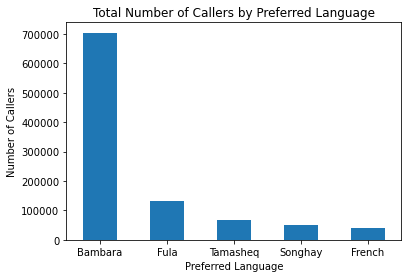

In [36]:
#plot preferred language
plt.figure()
df_mali['subscriber_pereferred_language'].value_counts().plot(kind='bar')
plt.title('Total Number of Callers by Preferred Language')
plt.xlabel('Preferred Language')
plt.ylabel('Number of Callers')
plt.xticks(rotation=0)
plt.show()

We can see that **Bambara** is the preferred language of subscribers in **Mali**. **703,742** callers (which is around **~71%** of our sample data) prefer this language.

#### Location

Next we will look at the location these callers within Mali call from. Note that **17.6%** of values in the `location` column are missing. 

A potential next step could be to look into how we can impute these missing values as knowing their location can better assist with the services being provided by Viamo and partners.  

In [37]:
#check counts for the locations subscribers/callers are calling from (Mali)
df_mali['location'].value_counts()

Sikasso           212289
Segou             148643
Kayes             135048
Koulikoro         103771
Mopti              85500
Bamako             55037
Tombouctou         38223
Kidal              23897
Gao                20909
Ségou                 21
Bankass               19
Kita                  18
Koutiala              14
Kati                  11
Koro                  11
Bougouni               7
Banamba                7
Diéma                  6
Sagabary               4
SÃ©gou                 4
Bla                    3
Kignan                 2
Kolondieba             1
Macina                 1
SÃƒÂ©gou               1
Ouelessebougou         1
Markala                1
Youwarou               1
Dioila                 1
Bandiagara             1
Fana                   1
SÃŒÃ„Ã¥Â©gou           1
San                    1
Douentza               1
Name: location, dtype: int64

**Sikasso** has more subscribers compared to other locations in **Mali**. 

We need to also look at `location_level_2` column.

In [38]:
#check counts for the locations subscribers/callers are calling from (Mali)
df_mali['location_level_2'].value_counts()

Cercle de Bougouni          65123
Cercle de Kadiolo           39431
Cercle de Barouéli          33889
Cercle de Koutiala          30828
Cercle de Bafoulabé         30298
Cercle de Bla               29320
Cercle de Kéniéba           27186
Cercle de Diéma             25245
Cercle de Dioïla            23594
Cercle de Banamba           23021
Cercle de Sikasso           22538
Cercle de Bandiagara        21718
Cercle de Macina            19225
Cercle de Bankass           15737
Cercle de Niono             14814
Cercle de Ségou             13559
Cercle de Kita              12629
Cercle de Goundam           11908
Cercle de Kayes             11900
Cercle de Djenné            11011
Cercle de Kangaba           10793
Cercle de Kati              10011
Cercle de San                9962
Cercle de Kolondiéba         8721
Cercle de Mopti              8399
Cercle de Gao                8129
Cercle de Yorosso            7857
Cercle de Koulikoro          7651
Cercle de Kolokani           7580
Cercle de Kida

We can see that **Cercle de Bougouni** is the top location, this is becasue **Cercle de Bougouni** is an administrative subdivision of the **Sailasso** region of **Mali**.

Next we will look at the age categories of the subscribers in Mali. 

#### Age

In [39]:
#checking for age in Mali dataset
df_mali['age'].value_counts()

18_24       218082
25_34       182493
under_18    165440
35_44       100471
over_44      74386
Name: age, dtype: int64

In [40]:
#checking for age range in Mali dataset - percentage
df_mali['age'].value_counts(normalize=True)*100

18_24       29.435854
25_34       24.632190
under_18    22.330443
35_44       13.561182
over_44     10.040331
Name: age, dtype: float64

Let's visualize the above numbers.

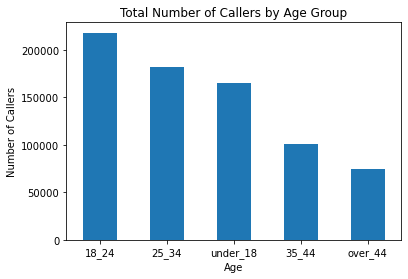

In [41]:
#plot number of age categories 
plt.figure()
df_mali['age'].value_counts().plot(kind='bar')
plt.title('Total Number of Callers by Age Group')
plt.xlabel('Age')
plt.ylabel('Number of Callers')
plt.xticks(rotation=0)
plt.show()

We can see that majority of callers are between the ages of **18 to 24** followed by **25 to 34**. 

Now we can take a look at gender. 

#### Gender

In [42]:
#checking for gender in Mali dataset
df_mali['gender'].value_counts()

male      668525
female    183007
Name: gender, dtype: int64

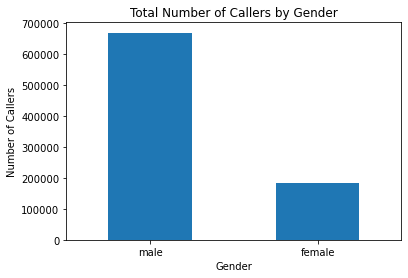

In [43]:
#plot callers based on gender
plt.figure()
df_mali['gender'].value_counts().plot(kind='bar')
plt.title('Total Number of Callers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Callers')
plt.xticks(rotation=0)
plt.show()

In [44]:
#what are the genders of callers in each age group
df_mali.groupby('age')['gender'].value_counts()

age       gender
18_24     male      166910
          female     50331
25_34     male      155072
          female     26921
35_44     male       88321
          female     11972
over_44   male       63683
          female     10543
under_18  male      103150
          female     61475
Name: gender, dtype: int64

In [45]:
df_mali['subscriber_id'].value_counts()

977142100578066432     157
1141692174535548928    144
1337044397388787200    143
1140259233024499712    141
1328677109371560040    134
                      ... 
1271852957600113148      1
990329819529535488       1
1055177879912505344      1
1140030652113543168      1
1382718218573508092      1
Name: subscriber_id, Length: 436680, dtype: Int64

In [46]:
df_mali['call_id'].value_counts()

1317807105600184808    4
1374527607756350048    4
1317609455403723176    4
1312537214320174080    4
1302011398855388044    4
                      ..
1305917346107941896    1
1290017065562333536    1
1373699351650036096    1
1411459151921996820    1
1385989848615675480    1
Name: call_id, Length: 991353, dtype: Int64

What type of topic to they dial in to listen to? Do they use it in sequence?
Are the majority of users listen to the same thing?
- How listeners behave on the platform?
- Who these listeners are?
- KM --> key message - what is the key message that indiviudals are dialing in to listen to?

In [48]:
df_mali['km_block_reached'].nunique()

348176

In [49]:
df_mali['block_theme'].value_counts()

                    560606
news                260219
health               72364
financial            18512
health,nutrition     17922
ed                   14092
security             13432
financial,rights     12173
gender               11462
rights               10594
ag                    5645
games                 2946
nutrition               33
Name: block_theme, dtype: int64

In [53]:
df_mali['block_title'].value_counts()

Digest or main menu?                                                                          149809
Main Menu                                                                                      82121
Choix Menu Tamani                                                                              69301
Titres du Journal                                                                              66304
Digest Intro                                                                                   49033
                                                                                               ...  
Quels sont les problèmes et les mythes concernant les personnes en situation de handicap ?         1
Q.9.3                                                                                              1
Teaser mAGRI Elévage (a)                                                                           1
Comment est-ce que les pesticides sont-ils classifiés ?                                    

In [54]:
df_mali['listen_menu_or_digest'].value_counts()

Listen Menu      455383
Listen Digest    198217
Name: listen_menu_or_digest, dtype: int64

## Question 15
#### Distribution of calls (unique call ids) over time (day, week, month)

In [55]:
#check number of unique call dates in our dataset
df_mali['call_date'].nunique()

691

There are 691 unique dates in our dataset.

Next we will look at the date range in our dataset.

In [59]:
#check the date range (year) in our dataset
import datetime
date_range = str(df_mali['call_date'].dt.year.min()) + ' to ' +str(df_mali['call_date'].dt.year.max())
date_range

'2020.0 to 2022.0'

#### Year

In [60]:
#value counts for call_date per year
df_mali['call_date'].dt.year.value_counts()

2021.0    549963
2022.0    450024
2020.0         3
Name: call_date, dtype: int64

The year **2021** had the most nummber of callers.

#### Month

In [68]:
#value counts for call_date per month
df_mali['call_date'].dt.month.value_counts()

3.0     96460
4.0     93072
1.0     88964
7.0     88742
10.0    88172
2.0     85789
5.0     84565
8.0     83275
11.0    82711
9.0     81337
6.0     79721
12.0    47182
Name: call_date, dtype: int64

We can see that **March** (month 3) has the **highest number of calls** followed by April. 
**December** has the **lowest number of calls**.

#### Day

In [69]:
#value counts for call_date per day
df_mali['call_date'].dt.day.value_counts()

4.0     34057
1.0     33980
7.0     33739
6.0     33673
10.0    33555
11.0    33512
3.0     33450
21.0    33407
8.0     33379
2.0     33322
15.0    33317
12.0    33246
23.0    33152
18.0    33117
22.0    33103
5.0     33035
17.0    32934
16.0    32792
25.0    32734
14.0    32705
13.0    32695
19.0    32577
26.0    32542
9.0     32474
24.0    32438
27.0    32382
20.0    32227
28.0    32006
29.0    28625
30.0    27480
31.0    18335
Name: call_date, dtype: int64

We can see that day **4** of the month has more callers and towards the end of the month (**day31**).

In [61]:
#check min/max for call_date
df_mali['call_date'].describe()

/var/folders/_2/shblqd712xgf_wv6wqksjbcr0000gn/T/ipykernel_37805/1879871102.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_mali['call_date'].describe()


count                  999990
unique                    691
top       2021-11-18 00:00:00
freq                     2346
first     2020-12-31 00:00:00
last      2022-11-21 00:00:00
Name: call_date, dtype: object

In [62]:
#sanity check - another way to check for min date in our dataset
df_mali['call_date'].min()

Timestamp('2020-12-31 00:00:00')

In [63]:
#sanity check - another way to check for max date in our dataset
df_mali['call_date'].max()

Timestamp('2022-11-21 00:00:00')

In [67]:
#count total calls per date (day/month/year)
df_mali.groupby('call_date')['call_id'].count().sort_values(ascending=False)

call_date
2021-11-18    2346
2021-11-17    2325
2021-11-16    2306
2021-11-19    2268
2021-12-02    2253
              ... 
2022-08-28     820
2022-07-09     815
2022-11-19     811
2022-11-20     639
2020-12-31       3
Name: call_id, Length: 691, dtype: int64

## Question 16
#### Distribution of number of calls per subscriber (overall, by month)

## Question 17
#### Distribution of time between calls by subscriber by calls

## Question 18
#### Frequency of calls by demographic variables (e.g. gender, education)

## Question 19
#### Frequency of duration of calls

## Question 20
#### Time of day distribution of calls

## Question 21
#### Day of week distribution of calls